### QUESTION 1

Using the Train and Validation set, design and classify a network with 3 convolutional hidden layers, followed by 2 fully-connected. Show your convolutional neural network configuration on the test set as accuracy and loss.

In [1]:
import os
from keras.optimizers import adam
from keras.preprocessing.image import ImageDataGenerator

from functions import create_model
from functions import get_num_files
from functions import get_num_subfolders
from functions import create_callback
from functions import load_last_weigts
from functions import plot_accuracy
from functions import plot_loss
from functions import create_img_generator

Using TensorFlow backend.


In [2]:
# Suppress warning and informational messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

In [3]:
# Main code
image_width, image_height=256, 256
Training_Epochs=50
Batch_Size=8
input_size = (image_width, image_height)

In [4]:
# dataset/
#   train/
#       category1/(contains all images related to category1)  
#       category2/(contains all images related to category2)
#       ...
#       ...       
# 
#   validation/
#       category1/(contains all images related to category1)  
#       category2/(contains all images related to category2)
#       ...
#       ...
#       
#   test/
#       category1/(contains all images related to category1)  
#       category2/(contains all images related to category2)
#       ...
#       ...

In [5]:
train_dir = './dataset/train'
validate_dir = './dataset/validation'
test_dir = './dataset/test'

In [6]:
num_classes = get_num_subfolders(train_dir)

num_train_samples = get_num_files(train_dir)
num_validate_samples = get_num_files(validate_dir)
num_test_samples = get_num_files(test_dir)

In [7]:
num_epoch = Training_Epochs
batch_size = Batch_Size

In [8]:
# Defining image generators for training and testing
train_image_gen = create_img_generator()
validation_image_gen = create_img_generator()

In [9]:
# Connect the image generator to a folder contains the source images the image generator alters
# Training image generator
train_generator = train_image_gen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_width),
    batch_size=batch_size,
    seed=42 # set seed for reproducability
    )


# Validation image generator
validation_generator = validation_image_gen.flow_from_directory(
    validate_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    seed=42 # set seed for reproducability
    )


# Test image generator
test_generator = ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    seed=42 # set seed for reproducability
    )

Found 4075 images belonging to 17 classes.
Found 494 images belonging to 17 classes.
Found 494 images belonging to 17 classes.


In [10]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints/q1_V5/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [11]:
# Creating the model
classifier=create_model(input_size)

In [12]:
# print model structure diagram
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
pool_0 (MaxPooling2D)        (None, 127, 127, 32)      0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 125, 125, 32)      9248      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 62, 62, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 60, 60, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 30, 30, 64)        0         
_________________________________________________________________
flate_0 (Flatten)            (None, 57600)            

In [13]:
# Compiling the CNN
classifier.compile(adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
checkpoint_path = "checkpoints/Q1/cp-{epoch:04d}.ckpt"
cp_callback = create_callback(checkpoint_path, 5)

In [15]:
hist = classifier.fit_generator(
    train_generator,
    epochs=num_epoch,
    steps_per_epoch=num_train_samples//batch_size,
    validation_data=validation_generator,
    validation_steps=num_validate_samples//batch_size,
    class_weight='auto',
    callbacks=[cp_callback]
    )

Epoch 1/50
509/509 [==============================] - 92s 181ms/step - loss: 7.2512 - accuracy: 0.2419 - val_loss: 2.5805 - val_accuracy: 0.2520
Epoch 2/50
509/509 [==============================] - 95s 187ms/step - loss: 2.3775 - accuracy: 0.2845 - val_loss: 2.6267 - val_accuracy: 0.2963
Epoch 3/50
509/509 [==============================] - 97s 191ms/step - loss: 2.3272 - accuracy: 0.2882 - val_loss: 2.1470 - val_accuracy: 0.2942
Epoch 4/50
509/509 [==============================] - 96s 189ms/step - loss: 2.3276 - accuracy: 0.2909 - val_loss: 2.8593 - val_accuracy: 0.3066
Epoch 5/50
509/509 [==============================] - 94s 185ms/step - loss: 2.2886 - accuracy: 0.2948 - val_loss: 2.3254 - val_accuracy: 0.3066

Epoch 00005: saving model to checkpoints/Q1/cp-0005.ckpt
Epoch 6/50
509/509 [==============================] - 99s 194ms/step - loss: 2.2778 - accuracy: 0.2960 - val_loss: 2.1849 - val_accuracy: 0.3066
Epoch 7/50
509/509 [==============================] - 93s 182ms/step - l

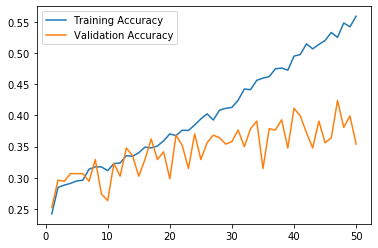

0

In [16]:
# Plot training and validation accuracy
plot_accuracy(hist)

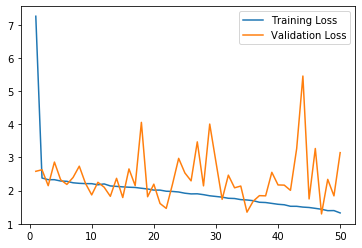

0

In [17]:
# Plot training and validation loss
plot_loss(hist)

In [18]:
# Print test set accuracy and loss values
scores = classifier.evaluate_generator(test_generator, num_test_samples/batch_size)
print("loss: {}, accuracy: {}".format(scores[0], scores[1]))

loss: 2.7835261821746826, accuracy: 0.3663967549800873
